Here we will have a look at raster data through an application using data from NASA's Carbon Monitoring System (CMS) program. We will focus on the small municipality of Puerto Asis in the Colombian Amazon and look at changes in Landsat-derived landuse between 2002 and 2016. Data for this notebook were downloaded from NASA'S EarthData library and hosted on CyVerse for cloud-based computing. If you would like to download the data for yourself you can access it here [https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1783](https://daac.ornl.gov/cgi-bin/dsviewer.pl?ds_id=1783). **NOTE:** A NASA EarthData account (free) is needed to download the data.

You can read more about working with raster data and the `rioxarray` library here:
> * [Earth Data Science Textbook](https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/fundamentals-raster-data/open-lidar-raster-python-xarray/)
> * [Rioxarray documentation](https://corteva.github.io/rioxarray/stable/getting_started/getting_started.html)

In [1]:
# Import Python libraries
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
import earthpy.plot as ep
import rioxarray as rxr

In [2]:
# Define link to url from (https://maps.princeton.edu/catalog/tufts-colombia-municipalities-11)
col_muni_url = ('https://maps.princeton.edu/download/file/tufts-colombia-municipalities-11-shapefile.zip')

# Open data using geopandas
col_muni_gdf = gpd.read_file(col_muni_url)
col_muni_gdf

,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
0,23189,637.49,Cabecera Municipal,CÓRDOBA,CIÉNAGA DE ORO,23,"POLYGON ((-75.71080 8.98249, -75.71119 8.98358..."
1,23570,795.00,Cabecera Municipal,CÓRDOBA,PUEBLO NUEVO,23,"POLYGON ((-75.25133 8.32489, -75.25144 8.32489..."
2,23068,1932.62,Cabecera Municipal,CÓRDOBA,AYAPEL,23,"POLYGON ((-75.18418 8.39828, -75.18352 8.39893..."
3,23580,1650.73,Cabecera Municipal,CÓRDOBA,PUERTO LIBERTADOR,23,"POLYGON ((-75.51257 7.94787, -75.51315 7.94683..."
4,23686,472.57,Cabecera Municipal,CÓRDOBA,SAN PELAYO,23,"POLYGON ((-75.71080 8.98249, -75.71024 8.98264..."
...,...,...,...,...,...,...,...
1123,23675,335.03,Cabecera Municipal,CÓRDOBA,SAN BERNARDO DEL VIENTO,23,"POLYGON ((-75.86320 9.42472, -75.86318 9.42231..."
1124,23672,210.75,Cabecera Municipal,CÓRDOBA,SAN ANTERO,23,"POLYGON ((-75.86320 9.42472, -75.86297 9.42476..."
1125,23168,320.42,Cabecera Municipal,CÓRDOBA,CHIMÁ,23,"POLYGON ((-75.71080 8.98249, -75.71213 8.98212..."
1126,23670,212.44,Cabecera Municipal,CÓRDOBA,SAN ANDRÉS DE SOTAVENTO,23,"POLYGON ((-75.57457 9.02304, -75.57458 9.02421..."


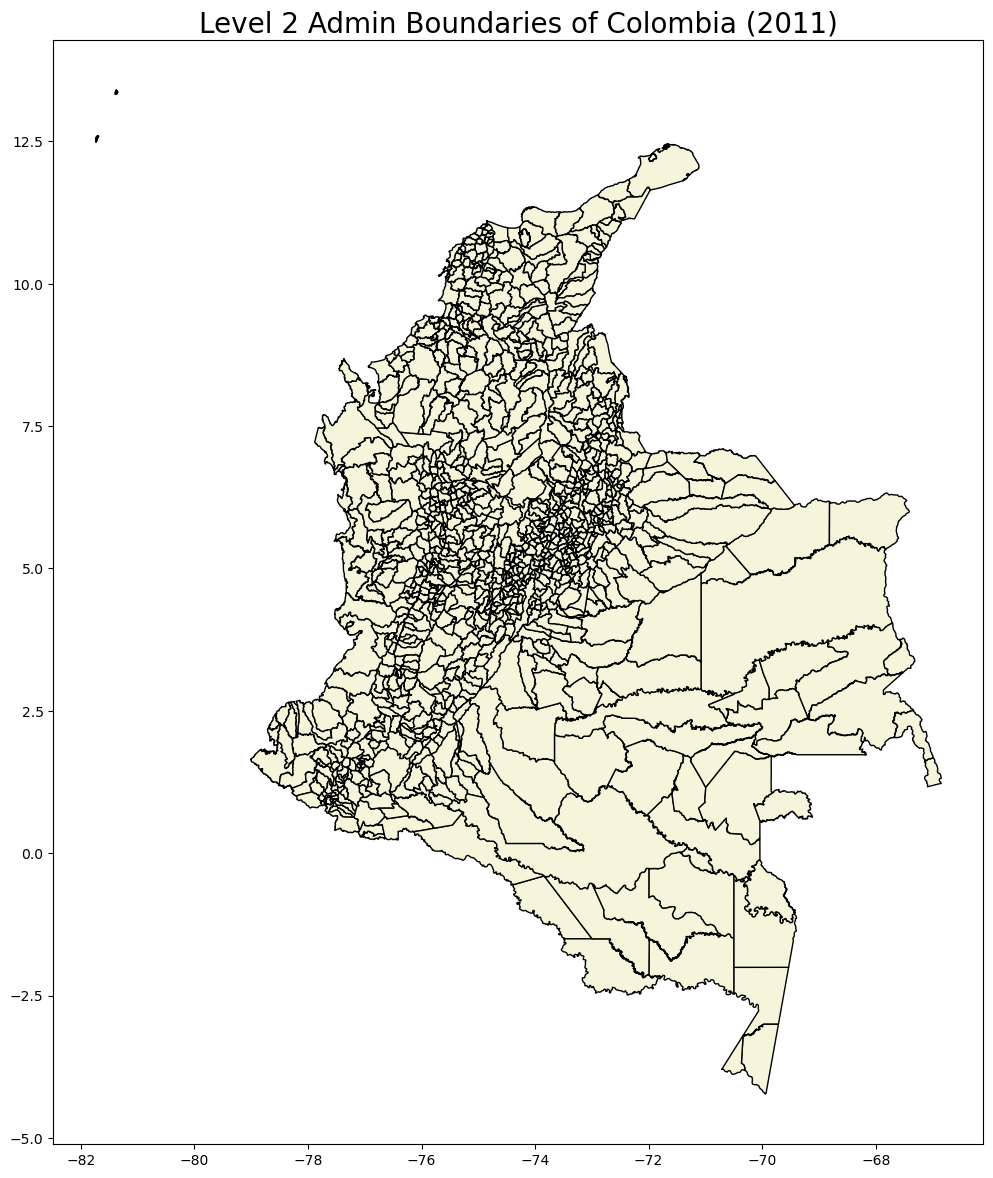

In [3]:
# Plot the geodataframe using Matplotlib
fig, ax = plt.subplots(figsize=(12,20))
col_muni_gdf.plot(ax=ax,
               edgecolor='black',
               color='beige')
plt.title('Level 2 Admin Boundaries of Colombia (2011)', fontsize=20)
plt.show()

In [4]:
# Select Putumayo Department, print the CRS, and call the data
putumayo = col_muni_gdf[col_muni_gdf["NOM_DEPART"].isin(["PUTUMAYO"])]
print("The CRS of putumayo is:\n", putumayo.crs)
putumayo

The CRS of putumayo is:
 GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433],AXIS["Longitude",EAST],AXIS["Latitude",NORTH]]


,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
467,86749,88.43,Cabecera Municipal,PUTUMAYO,SIBUNDOY,86,"POLYGON ((-76.96553 1.15862, -76.96538 1.15901..."
468,86760,339.98,Cabecera Municipal,PUTUMAYO,SANTIAGO,86,"POLYGON ((-77.04651 0.97891, -77.04607 0.98036..."
469,86219,187.50,Cabecera Municipal,PUTUMAYO,COLÓN,86,"POLYGON ((-76.96553 1.15862, -76.96592 1.15895..."
470,86755,408.74,Cabecera Municipal,PUTUMAYO,SAN FRANCISCO,86,"POLYGON ((-76.85293 1.04544, -76.85349 1.04587..."
998,86865,798.54,Cabecera Municipal,PUTUMAYO,VALLE DEL GUAMUEZ (La Hormiga),86,"POLYGON ((-77.05013 0.28792, -77.05196 0.28617..."
999,86757,386.20,Cabecera Municipal,PUTUMAYO,SAN MIGUEL (La Dorada),86,"POLYGON ((-77.05013 0.28792, -77.04992 0.28890..."
1000,86320,1951.31,Cabecera Municipal,PUTUMAYO,ORITO,86,"POLYGON ((-77.07315 0.94485, -77.07294 0.94451..."
1001,86885,1398.80,Cabecera Municipal,PUTUMAYO,VILLAGARZÓN,86,"POLYGON ((-77.04651 0.97891, -77.01514 0.98044..."
1002,86001,1328.83,CAP. DEPTO,PUTUMAYO,MOCOA,86,"POLYGON ((-76.87674 1.28927, -76.87881 1.29186..."
1003,86568,2800.64,Cabecera Municipal,PUTUMAYO,PUERTO ASÍS,86,"POLYGON ((-76.14319 0.37627, -76.14494 0.37667..."


<Axes: >

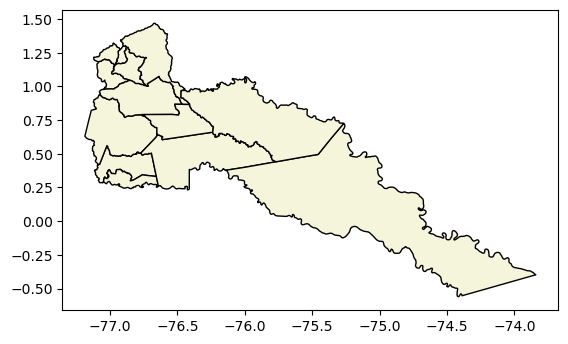

In [5]:
# Plot Putumayo using .plot()
putumayo.plot(color='beige', edgecolor='black')

In [6]:
# Select Puerto Asís from Putumayo
pr_as = putumayo[putumayo["NOM_MUNICI"].isin(["PUERTO ASÍS"])]
pr_as

,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
1003,86568,2800.64,Cabecera Municipal,PUTUMAYO,PUERTO ASÍS,86,"POLYGON ((-76.14319 0.37627, -76.14494 0.37667..."


In [7]:
# NOTE: the following syntax also works to select/subset data
pr_as2 = putumayo[putumayo["NOM_MUNICI"] == "PUERTO ASÍS"]
pr_as2

,ID_ESPACIA,AREA_OFICI,ENTIDAD_TE,NOM_DEPART,NOM_MUNICI,COD_DEPTO,geometry
1003,86568,2800.64,Cabecera Municipal,PUTUMAYO,PUERTO ASÍS,86,"POLYGON ((-76.14319 0.37627, -76.14494 0.37667..."


<Axes: >

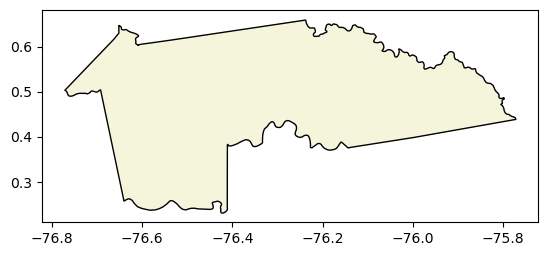

In [8]:
# Plot Puerto Asís
pr_as.plot(color='beige', edgecolor='black')

In [9]:
# Define url to 2002 raster data
raster_2002_url = ("https://data.cyverse.org/dav-anon/iplant/home/shared/"
                   "earthlab/geopark/landcover_colombian_amazon_2002.tif")

In [12]:
# Define url to 2016 raster data
raster_2016_url = ("https://data.cyverse.org/dav-anon/iplant/home/shared/"
                   "earthlab/geopark/landcover_colombian_amazon_2016.tif")

In [13]:
# Open 2002 data using rioxarray
landcover_2002_arr = rxr.open_rasterio(raster_2002_url, masked=True).squeeze()
landcover_2002_arr

<xarray.DataArray (y: 34165, x: 44745)>
[1528712925 values with dtype=float32]
Coordinates:
    band         int64 1
  * x            (x) float64 1.641e+05 1.641e+05 ... 1.506e+06 1.506e+06
  * y            (y) float64 5.952e+05 5.951e+05 ... -4.297e+05 -4.298e+05
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        7
    STATISTICS_MEAN:           1.3176634733616
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         0.99581730881901
    STATISTICS_VALID_PERCENT:  34.03
    scale_factor:              1.0
    add_offset:                0.0

In [11]:
# Check CRS of the raster data
landcover_2002_arr.rio.crs

CRS.from_epsg(32618)

<Axes: >

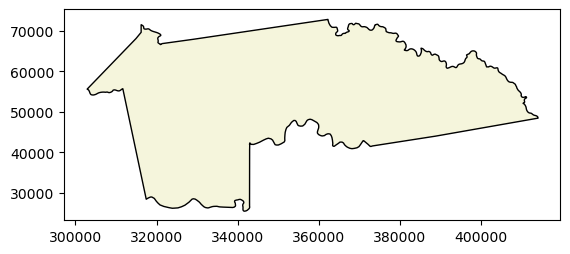

In [14]:
# Reproject Puerto Asís shp to same CRS as raster (EPSG: 32618)
pr_as_32618 = pr_as.to_crs(landcover_2002_arr.rio.crs)
pr_as_32618.plot(color='beige', edgecolor='black')

In [15]:
# Clip the 2002 raster data to the Puerto Asis boundary
clipped_2002 = rxr.open_rasterio(raster_2002_url, masked=True).squeeze().rio.clip(pr_as_32618.geometry, from_disk=True)
clipped_2002

<xarray.DataArray (y: 1577, x: 3708)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 3.028e+05 3.028e+05 3.028e+05 ... 4.14e+05 4.14e+05
  * y            (y) float64 7.293e+04 7.29e+04 ... 2.568e+04 2.565e+04
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        7
    STATISTICS_MEAN:           1.3176634733616
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         0.99581730881901
    STATISTICS_VALID_PERCENT:  34.03
    scale_factor:              1.0
    add_offset:                0.0

In [16]:
# Open and clip the 2016 raster data to the Puerto Asis boundary
clipped_2016 = rxr.open_rasterio(raster_2016_url, masked=True).squeeze().rio.clip(pr_as_32618.geometry, from_disk=True)
clipped_2016

<xarray.DataArray (y: 1577, x: 3708)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    band         int64 1
  * x            (x) float64 3.028e+05 3.028e+05 3.028e+05 ... 4.14e+05 4.14e+05
  * y            (y) float64 7.293e+04 7.29e+04 ... 2.568e+04 2.565e+04
    spatial_ref  int64 0
Attributes:
    AREA_OR_POINT:             Area
    STATISTICS_MAXIMUM:        7
    STATISTICS_MEAN:           1.3297671847732
    STATISTICS_MINIMUM:        0
    STATISTICS_STDDEV:         1.0287005111847
    STATISTICS_VALID_PERCENT:  34.03
    scale_factor:              1.0
    add_offset:                0.0

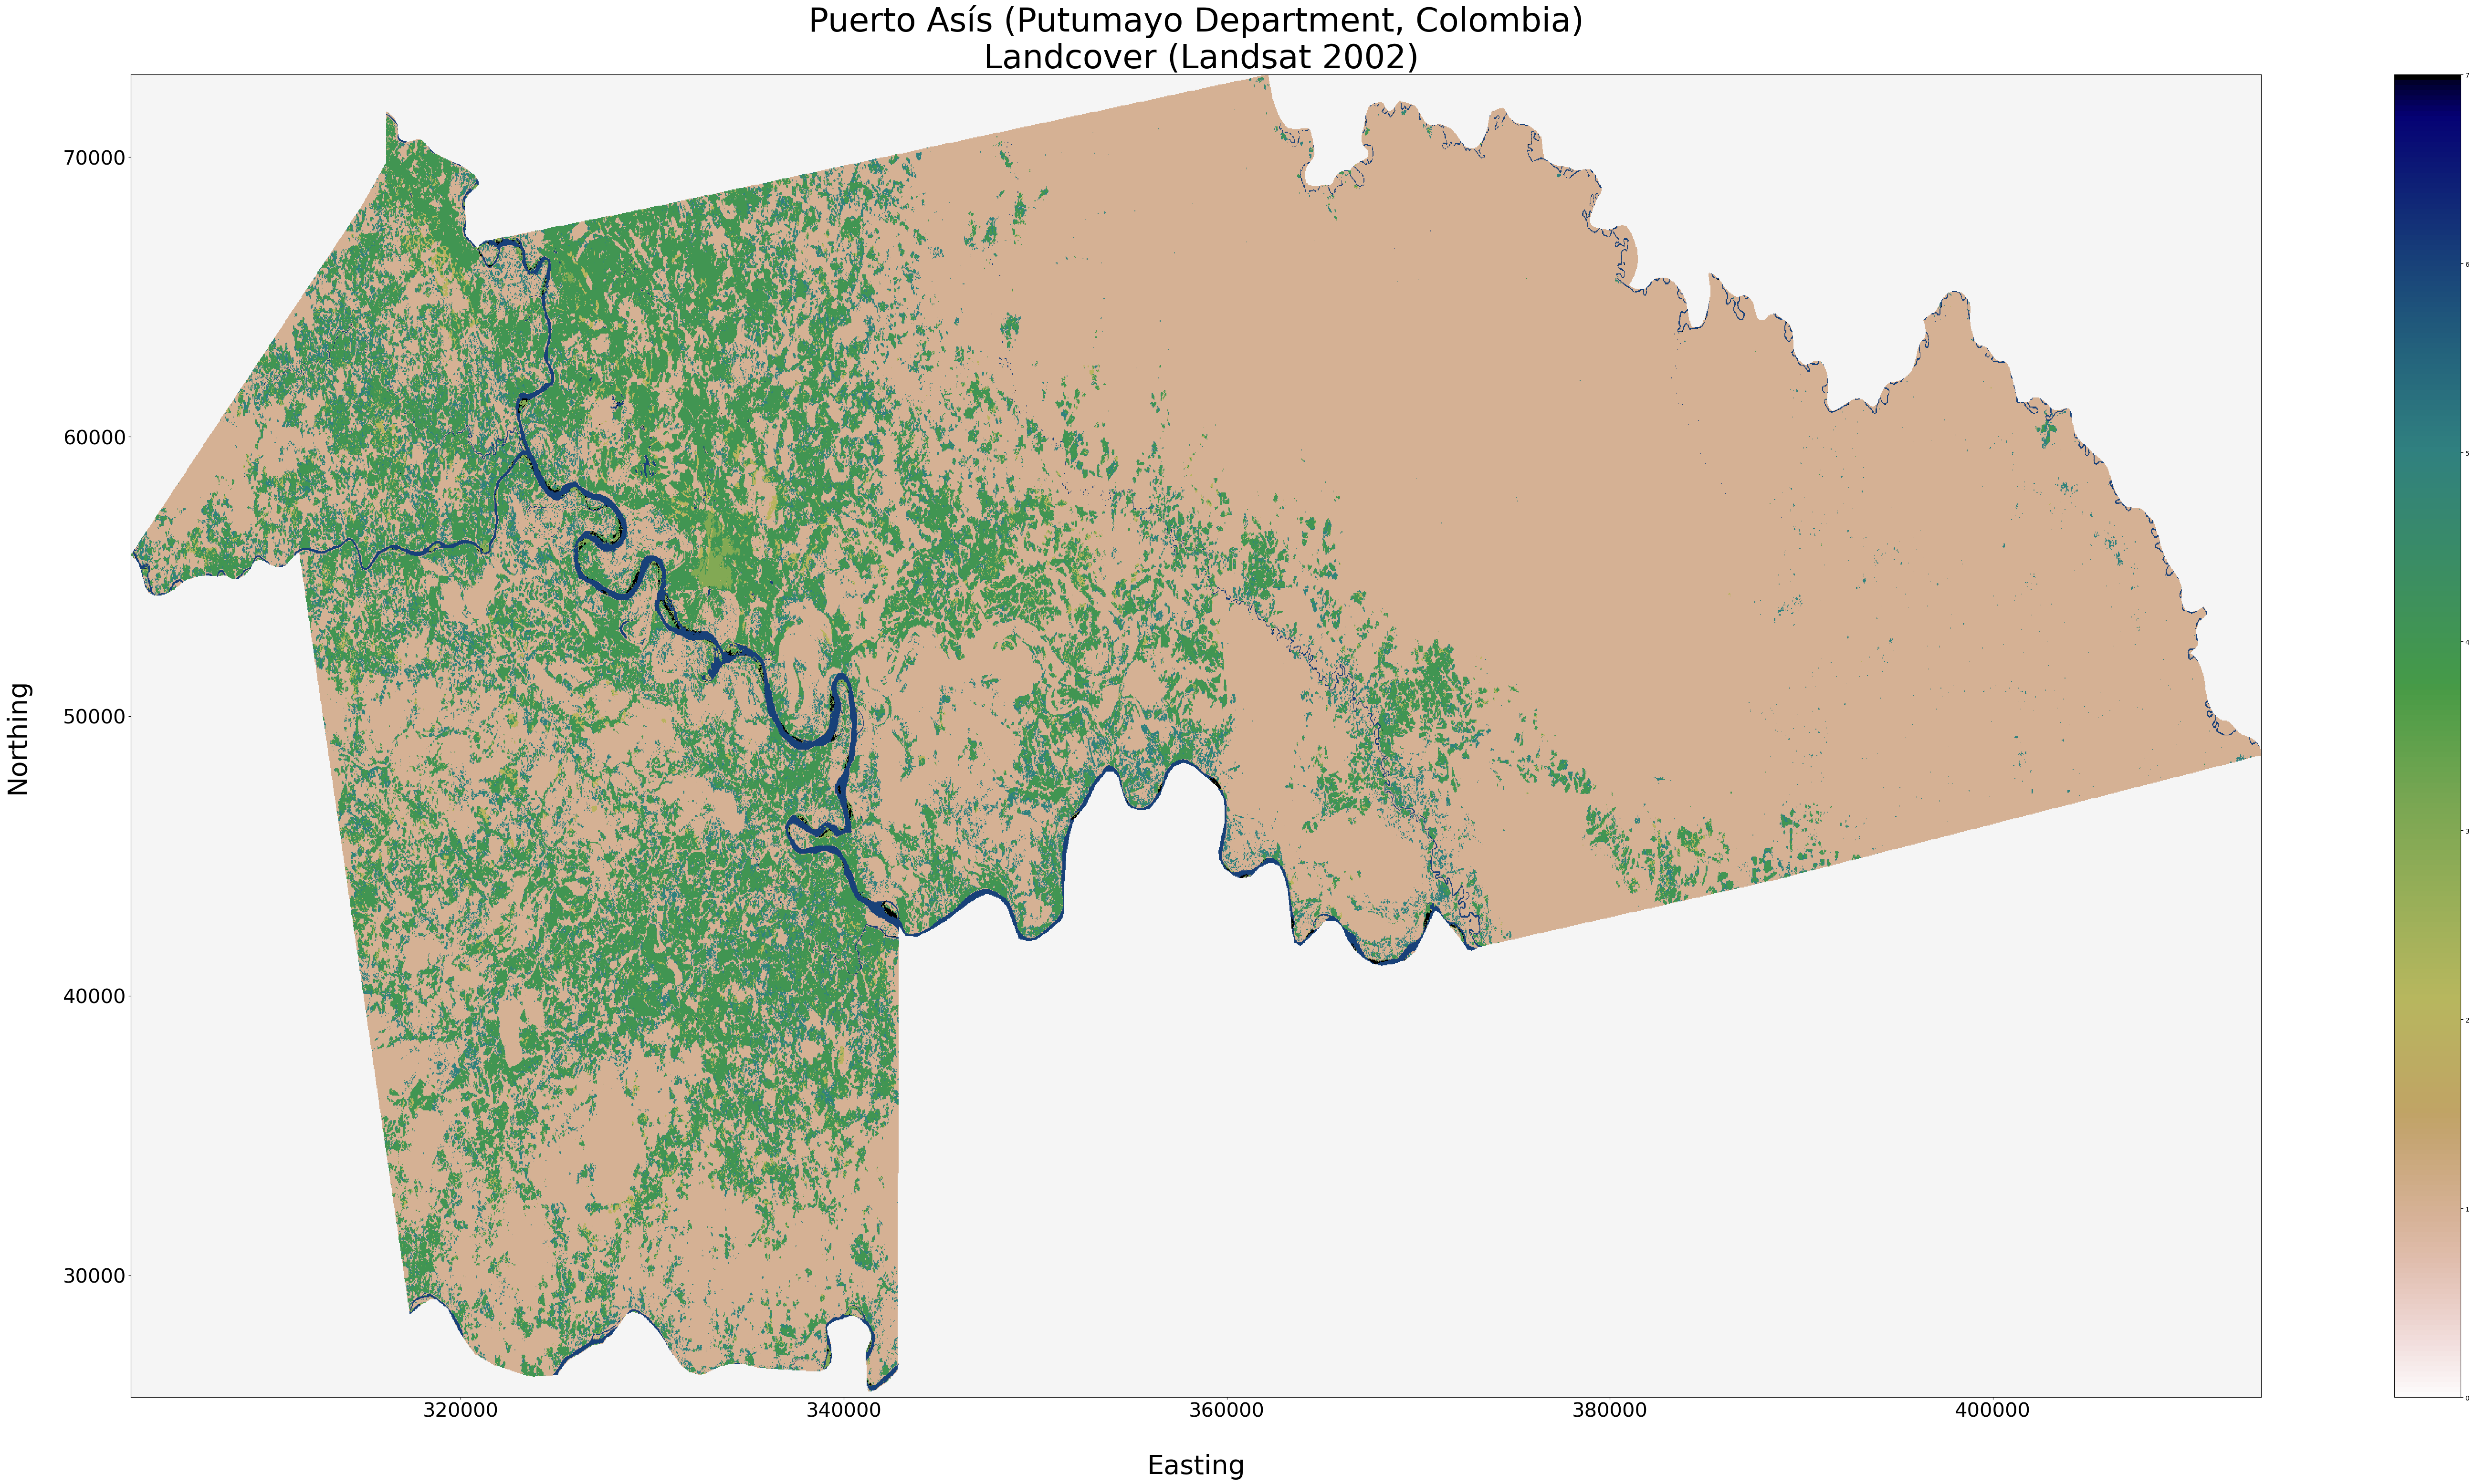

In [17]:
# Plot the raster clipped to Florencia (2002)
fig, ax = plt.subplots(figsize=(72,36))
clipped_2002.plot(ax=ax,
                          #alpha=0.8,
                          add_colorbar=True, 
                          cmap='gist_earth_r')

plt.title("Puerto Asís (Putumayo Department, Colombia)\n Landcover (Landsat 2002)",fontsize=50)
plt.xlabel("\nEasting", fontsize=40)
plt.ylabel("Northing\n", fontsize=40)
ax.tick_params(axis='both', which='major', labelsize=30)
ax.set_facecolor("whitesmoke")
#ax.annotate('2001', xy=(380000, 30000), size=160)
plt.show()

In [31]:
# Customizing the cmap (ChatGPT)
import numpy as np
from matplotlib.colors import ListedColormap, BoundaryNorm

cms_colors = ['black', 
              'forestgreen', 
              'orange',
              'purple',
              'darkgoldenrod',
              'limegreen',
              'tab:blue',
              'yellow']

cms_cmap = ListedColormap(cms_colors)

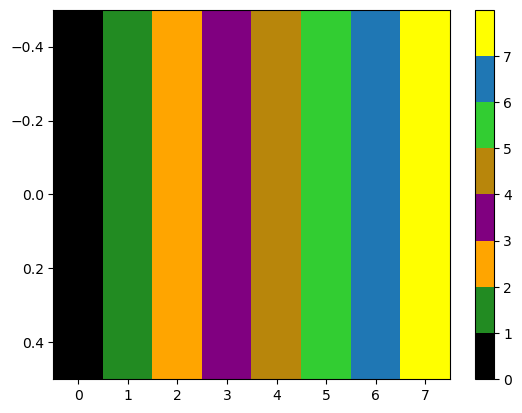

In [32]:
# Create a dummy array to map colors to
dummy_data = np.arange(8).reshape(1, -1)

# Plot the colorbar
plt.imshow(dummy_data, cmap=cms_cmap, aspect='auto', vmin=0, vmax=8)
plt.colorbar(ticks=np.arange(8))
plt.show()

In [20]:
# Create custom labels ()

# Define labels
landuse_labels = ["Unclassified",
                  "Forest",
                  "Natural Grassland",
                  "Urban",
                  "Pasture",
                  "Secondary Forest",
                  "Water",
                  "Highly Reflective Surface"]

# Define bins
class_bins = [0,1,2,3,4,5,6,7,10]

# Define norm
norm = BoundaryNorm(class_bins,
                    len(cms_colors))

In [33]:
# Creating the legend elements

from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='black', lw=18, label='Unclassified',),
                   Line2D([0], [0], color='forestgreen', lw=18, label='Forest'),
                   Line2D([0], [0], color='orange', lw=18, label='Natural Grassland'),
                   Line2D([0], [0], color='purple', lw=18, label='Urban'),
                   Line2D([0], [0], color='darkgoldenrod', lw=18, label='Pasture'),
                   Line2D([0], [0], color='limegreen', lw=18, label='Secondary Forest'),
                   Line2D([0], [0], color='tab:blue', lw=18, label='Water'),
                   Line2D([0], [0], color='yellow', lw=18, label='Highly Reflective Surface')]


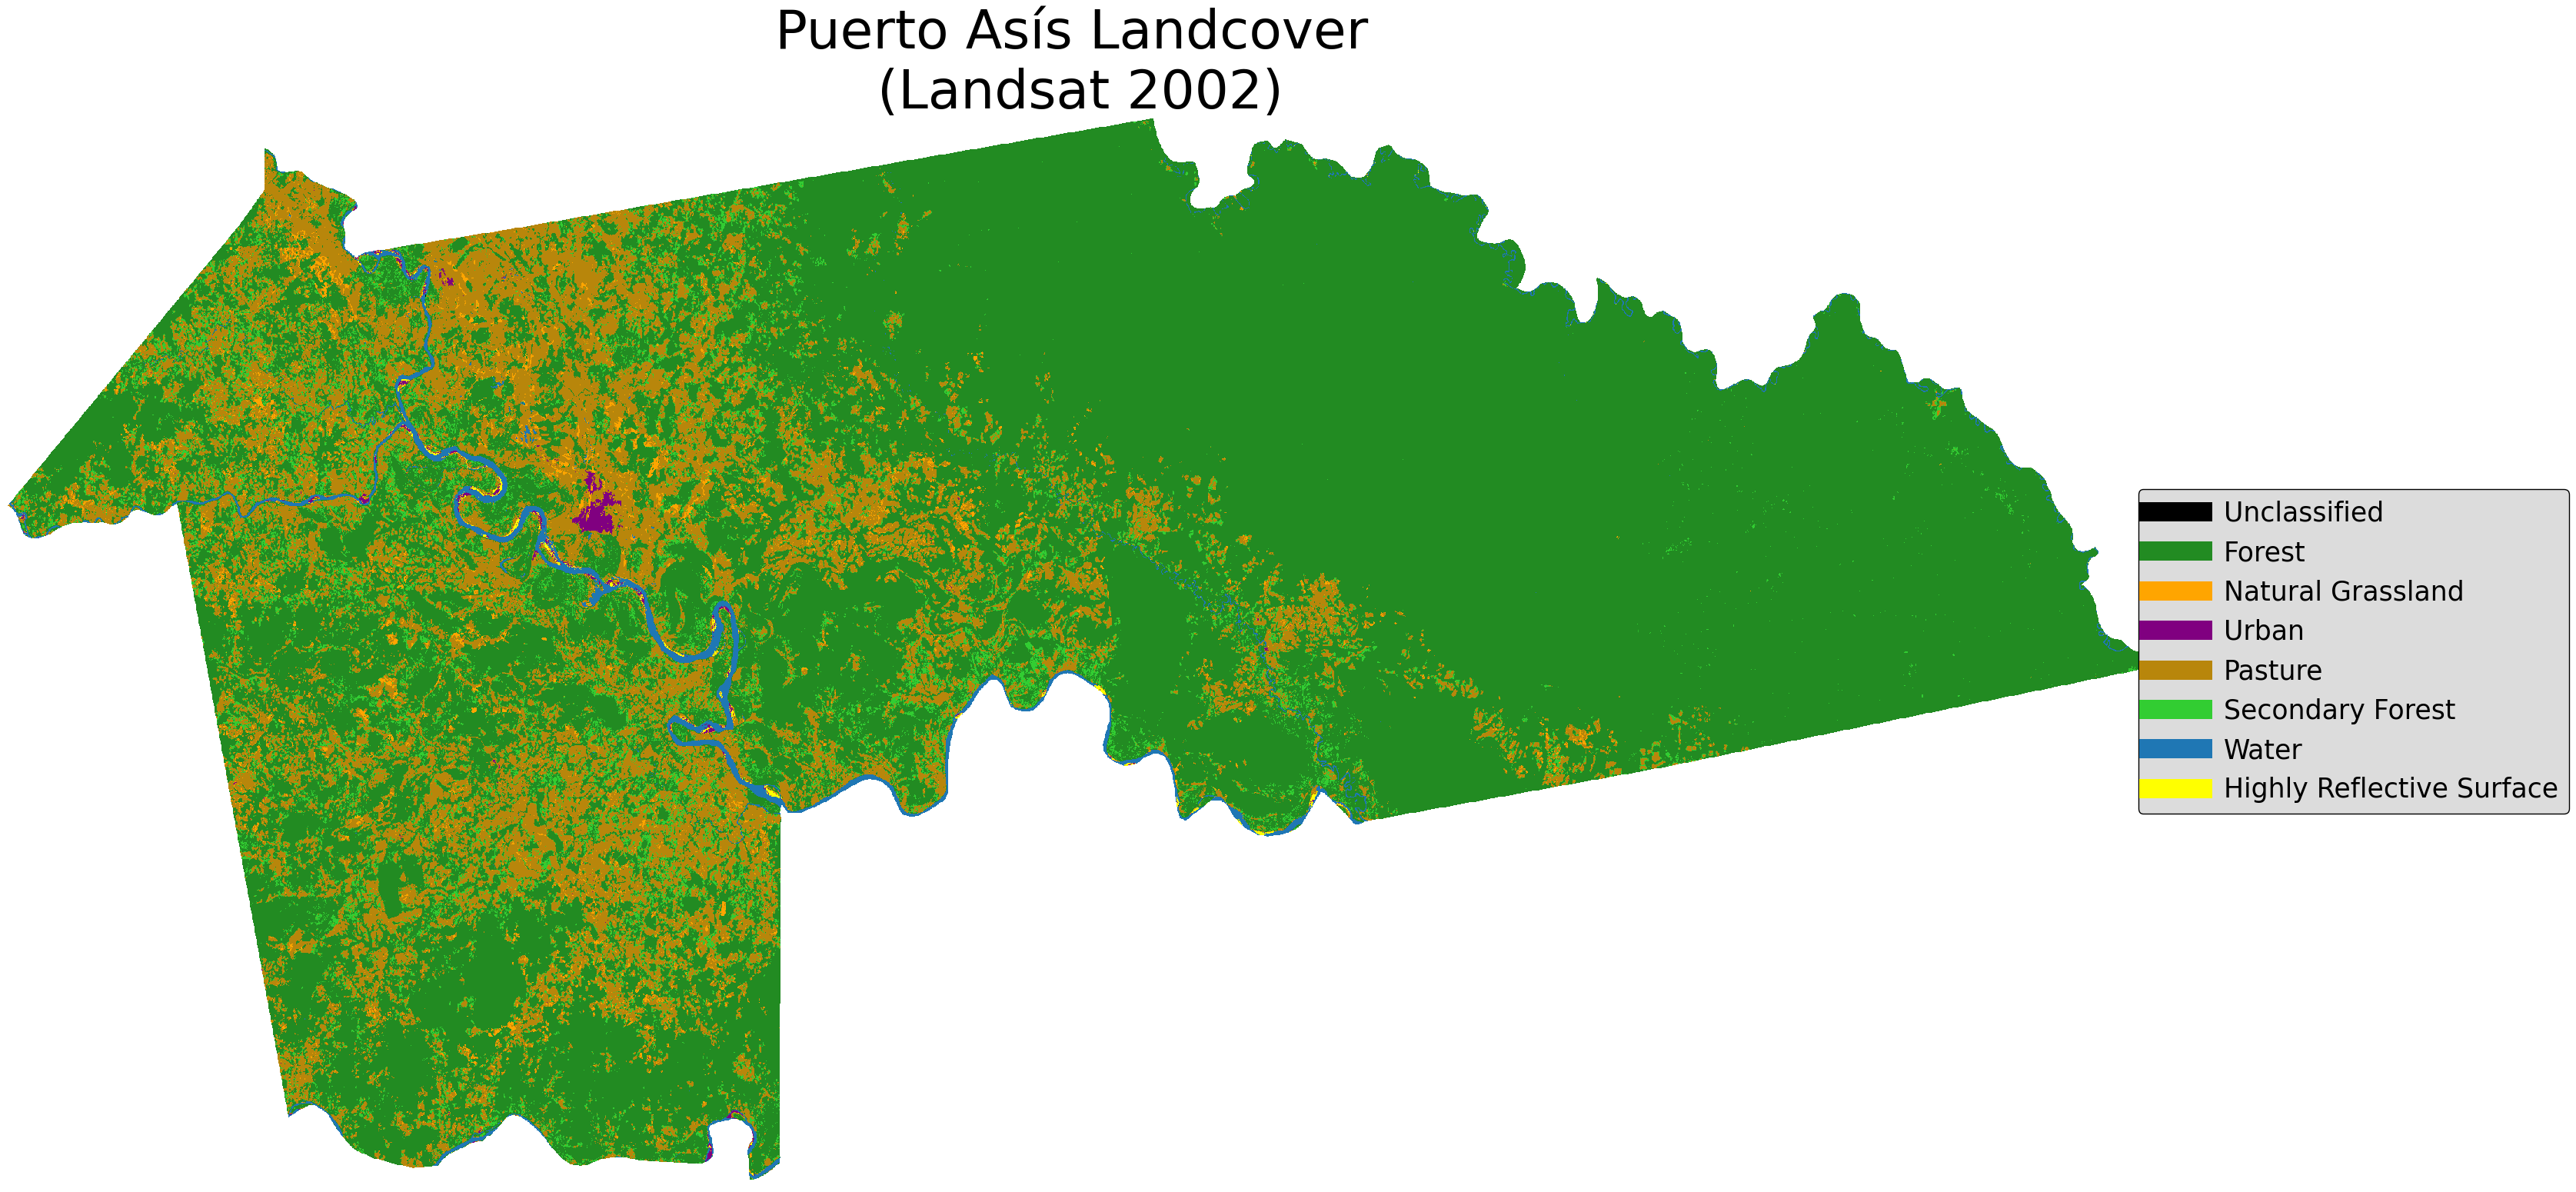

In [34]:
# Plot the raster clipped to Puerto Asís (2002)

fig, ax = plt.subplots(figsize=(36,18))

clipped_2002.where(clipped_2002!=clipped_2002.rio.nodata).plot(
    ax=ax,
    add_colorbar=False,
    cmap=cms_cmap,
    norm=norm)
plt.title("Puerto Asís Landcover \n(Landsat 2002)",fontsize=50)

ax.axis('off')

ax.legend(handles=legend_elements,
          loc='right',
          fontsize='25',
          facecolor='gainsboro',
          edgecolor='black',
          framealpha=1.0,
          bbox_to_anchor=(1.2, 0.5))

plt.show()

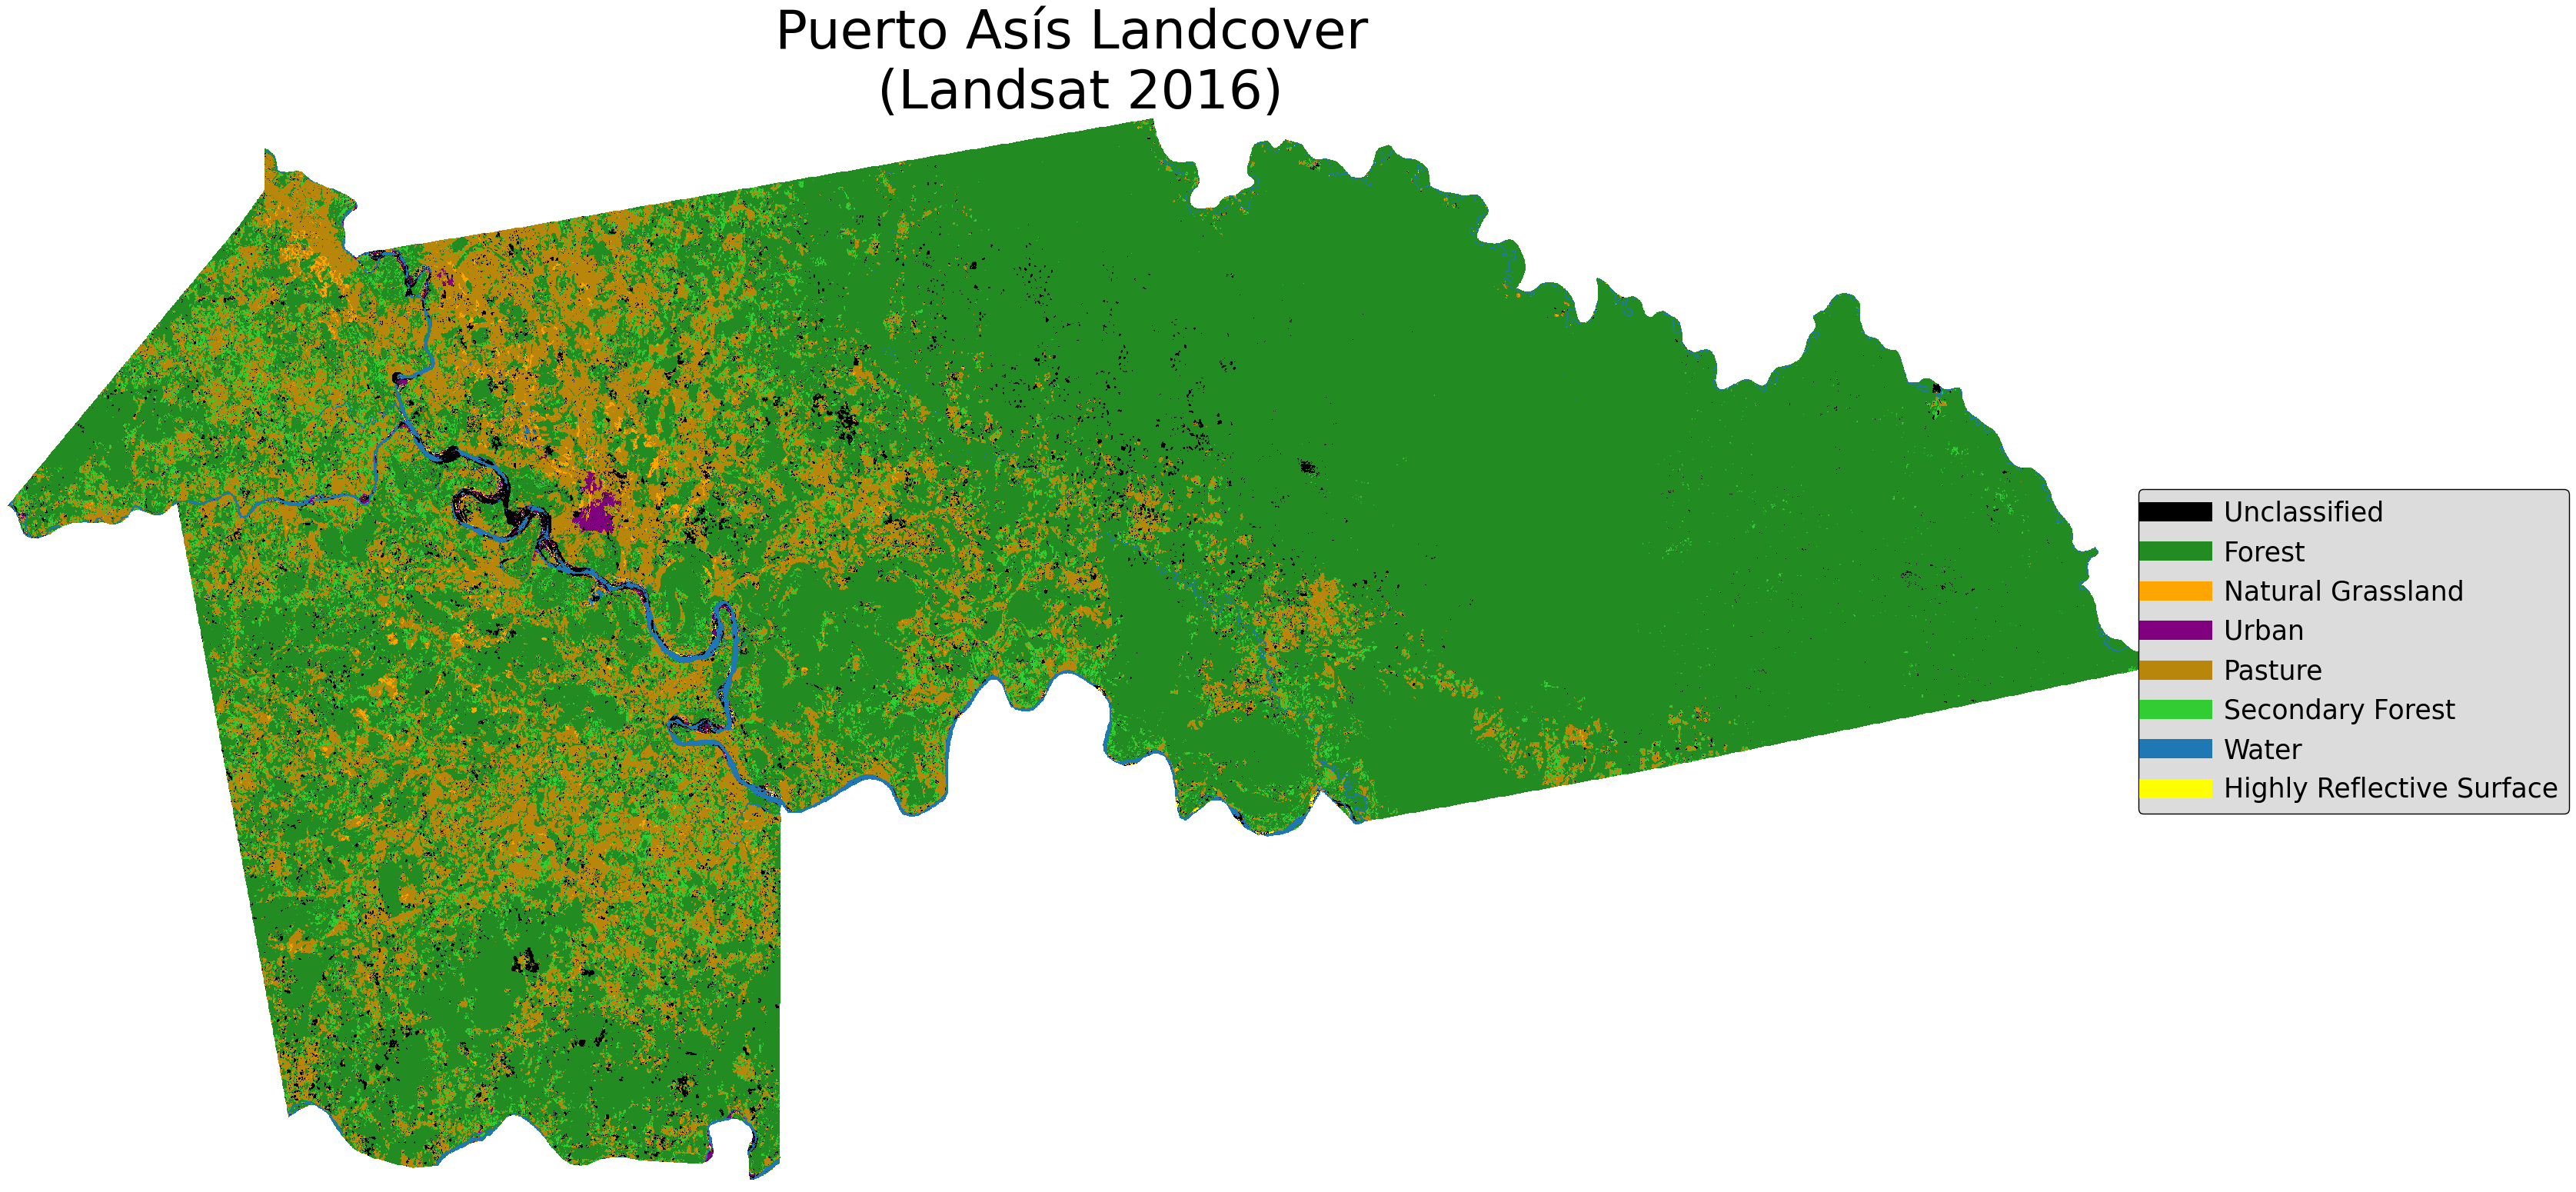

In [35]:
# Plot the raster clipped to Puerto Asís (2016)

fig, ax = plt.subplots(figsize=(36,18))

clipped_2016.where(clipped_2016!=clipped_2016.rio.nodata).plot(
    ax=ax,
    add_colorbar=False,
    cmap=cms_cmap,
    norm=norm)
plt.title("Puerto Asís Landcover \n(Landsat 2016)",fontsize=50)

ax.axis('off')

ax.legend(handles=legend_elements,
          loc='right',
          fontsize='25',
          facecolor='gainsboro',
          edgecolor='black',
          framealpha=1.0,
          bbox_to_anchor=(1.2, 0.5))

plt.show()